In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import random

from keras.utils import np_utils #comment
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.models import load_model

Using TensorFlow backend.


In [15]:
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.xlabel('Epoch')
    plt.ylabel(train)
    plt.legend(['train','validation'],loc='upper left')
    plt.show()
    
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig=plt.gcf()
    fig.set_size_inches(12,14)
    if num>25: num=25
    for i in range(0, num):
        ax=plt.subplot(5,5,1+i)
        ax.imshow(images[idx], cmap='binary')
        title="label="+str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx])
               
        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()

In [16]:
import os
res = os.walk(r"D:\python\1210\19")
flist=[]
for i, j, k in res:
    for g in k:
        tmp = i+"\\"+g
        flist.append(tmp)
        

flag=0
for i in flist:
    lbl = int(i[-5])
    frame = Image.open(i)
    new_frame=frame.resize((28,28) )    
    bb = np.asarray(new_frame)

    ffmax = bb.max()
    bb_new = bb.copy()
    for j in range(28):
        for i in range(28):
            if bb[i,j]==ffmax:
                bb_new[i,j]=0
            else:
                bb_new[i,j]=255    
    
    
    
    
    
    aa = bb_new.reshape(784)
    
    if flag==0:
        my_test_ftr = aa
        my_test_lbl = [lbl] 
        my_test_image = bb_new
        flag+=1
    else:
        my_test_ftr = np.vstack((my_test_ftr,aa))
        my_test_lbl.append(lbl)
        my_test_image = np.dstack((my_test_image,bb_new))
        flag+=1
        
        if flag==5:
            kk=bb_new
        
my_test_lbl = np.array(my_test_lbl)   
print(my_test_ftr.shape)
print(my_test_lbl.shape)
print(my_test_image.shape)
n = len(my_test_lbl)
n1= my_test_image.shape[0]
n2= my_test_image.shape[1]
n3= my_test_image.shape[2]
tt=np.zeros((n3,n2,n1))
for i in range(n3):
    tt[i,:,:] = my_test_image[:,:,i]
print(my_test_image.shape)

(20, 784)
(20,)
(28, 28, 20)
(28, 28, 20)


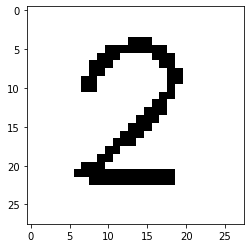

In [17]:
ax=plt.subplot(1,1,1)
ax.imshow(tt[0], cmap='binary')
plt.show()

In [18]:
mm=my_test_ftr.max()
print(mm)
my_test_ftr_n = my_test_ftr / mm
my_test_lbl_o = np_utils.to_categorical(my_test_lbl, num_classes=10)

print(my_test_ftr_n.shape)
print(my_test_lbl_o.shape)

255
(20, 784)
(20, 10)


In [19]:
nn = len(my_test_lbl)
train_num = int(nn * 0.0) 
print("Total number: ", nn, "trainning number: ", train_num)
content = list(range(0,nn))
print("content: ", content, " --- length = ", len(content))
ind_train = random.sample(content,train_num)
ind_test  = list(set(content)-set(ind_train))


Total number:  20 trainning number:  0
content:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]  --- length =  20


In [36]:
model_w = load_model("model_from_web.h5")
model_t = load_model("model_from_teacher.h5")


In [41]:
scores = model_w.evaluate(my_test_ftr_n[ind_test], my_test_lbl_o[ind_test])
print()
print('accuracy = ', scores[1])
prediction = model_w.predict_classes(my_test_ftr[ind_test])

20/20 [==============================] - 0s 1ms/step

accuracy =  0.75


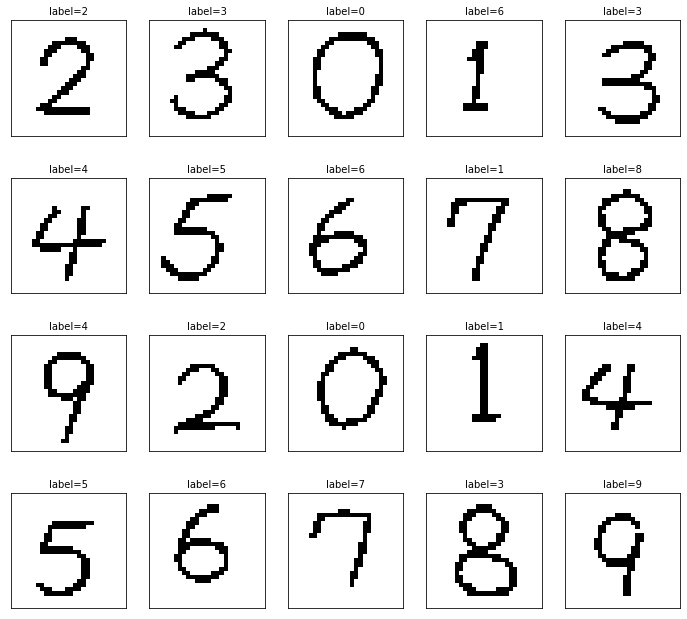

In [38]:
plot_images_labels_prediction(tt,prediction,[],0,20)

In [39]:
pd.crosstab(my_test_lbl[ind_test], prediction,rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,2,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,1,0,0,0
2,0,0,2,0,0,0,0,0,0,0
3,0,0,0,2,0,0,0,0,0,0
4,0,0,0,0,2,0,0,0,0,0
5,0,0,0,0,0,2,0,0,0,0
6,0,0,0,0,0,0,2,0,0,0
7,0,1,0,0,0,0,0,1,0,0
8,0,0,0,1,0,0,0,0,1,0


In [40]:
scores = model_t.evaluate(my_test_ftr_n[ind_test], my_test_lbl_o[ind_test])
print()
print('accuracy = ', scores[1])
prediction = model_t.predict_classes(my_test_ftr[ind_test])

20/20 [==============================] - 0s 17ms/step

accuracy =  0.20000000298023224
